# EDA: DCASE 2020 Challenge Task 2 Development Dataset

- [DCASE 2020 Challenge Task 2 Unsupervised Detection of Anomalous Sounds for Machine Condition Monitoring](http://dcase.community/challenge2020/task-unsupervised-detection-of-anomalous-sounds)
- [DCASE 2020 Challenge Task 2 Development Dataset](https://zenodo.org/record/3678171#.XnGwM5P7SL4)

Let's dive into the dataset.

In [2]:
from common import *

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")

sns.set_palette("husl")

DATA_ROOT = Path('/data/task2/dev') # set your data folder here
! ls {DATA_ROOT}

fan  pump  slider  ToyCar  ToyConveyor	valve


## Basic information/stats

Check list of machine types.

In [3]:
types = [t.name for t in sorted(DATA_ROOT.glob('*'))]
print('Machine types:', types)

Machine types: ['ToyCar', 'ToyConveyor', 'fan', 'pump', 'slider', 'valve']


What's included in machine type folder?

In [4]:
!ls {DATA_ROOT/types[0]}

test  train


How many test samples included?

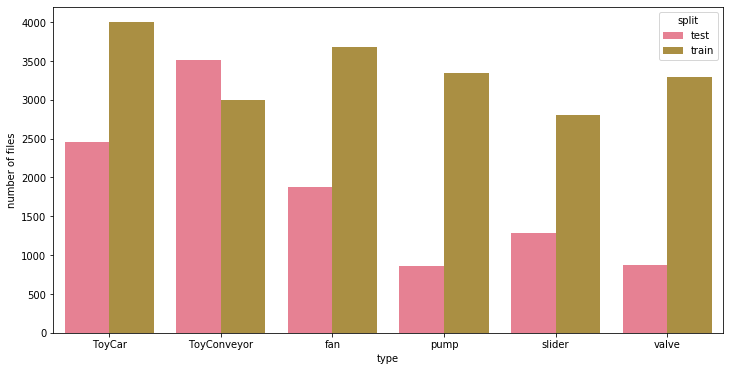

type  ToyCar       ToyConveyor         fan       pump       slider        \
split   test train        test train  test train test train   test train   
file    2459  4000        3509  3000  1875  3675  856  3349   1290  2804   

type  valve        
split  test train  
file    879  3291

In [5]:
df = pd.DataFrame()
df['file'] = sorted(DATA_ROOT.glob('*/*/*.wav'))
df['type'] = df.file.map(lambda f: f.parent.parent.name)
df['split'] = df.file.map(lambda f: f.parent.name)

agg = df.groupby(['type', 'split']).agg('count')
fig = plt.figure(figsize=(12.0, 6.0))
g = sns.barplot(x="type", y="file", hue="split", data=agg.reset_index())
plt.ylabel("machine type")
plt.ylabel("number of files")
plt.show()
agg.transpose()

### Check/confirm all samples completely

Do they have all the same:
- sampling rate
- frame length

Before checking this, run a python program to get info from all the files and store it in a .csv.

In [6]:
# run once - takes 2-3 hours

# ! python get_file_info.py

It is confirmed that:
- Consistent among files in one machine type.
- Only ToyCar has longer audio - 11s, all others are 10s long.
- All files are sampling rate 22,050 Hz.

In [7]:
df = pd.read_csv('file_info.csv')
df.groupby(['type', 'split']).describe()

frames                                               \
                    count      mean  std       min       25%       50%   
type        split                                                        
ToyCar      test   2459.0  242550.0  0.0  242550.0  242550.0  242550.0   
            train  4000.0  242550.0  0.0  242550.0  242550.0  242550.0   
ToyConveyor test   3509.0  220500.0  0.0  220500.0  220500.0  220500.0   
            train  3000.0  220500.0  0.0  220500.0  220500.0  220500.0   
fan         test   1875.0  220500.0  0.0  220500.0  220500.0  220500.0   
            train  3675.0  220500.0  0.0  220500.0  220500.0  220500.0   
pump        test    856.0  220500.0  0.0  220500.0  220500.0  220500.0   
            train  3349.0  220500.0  0.0  220500.0  220500.0  220500.0   
slider      test   1290.0  220500.0  0.0  220500.0  220500.0  220500.0   
            train  2804.0  220500.0  0.0  220500.0  220500.0  220500.0   
valve       test    879.0  220500.0  0.0  220500.0  220500.0  220500.0   
            train  3291.0  220500.0  0.0  220500.0  220500.0  220500.0   

                                      sampling_rate           ...           \
                        75%       max         count     mean  ...      75%   
type        split                                             ...            
ToyCar      test   242550.0  242550.0        2459.0  22050.0  ...  22050.0   
            train  242550.0  242550.0        4000.0  22050.0  ...  22050.0   
ToyConveyor test   220500.0  220500.0        3509.0  22050.0  ...  22050.0   
            train  220500.0  220500.0        3000.0  22050.0  ...  22050.0   
fan         test   220500.0  220500.0        1875.0  22050.0  ...  22050.0   
            train  220500.0  220500.0        3675.0  22050.0  ...  22050.0   
pump        test   220500.0  220500.0         856.0  22050.0  ...  22050.0   
            train  220500.0  220500.0        3349.0  22050.0  ...  22050.0   
slider      test   220500.0  220500.0        1290.0  22050.0  ...  22050.0   
            train  220500.0  220500.0        2804.0  22050.0  ...  22050.0   
valve       test   220500.0  220500.0         879.0  22050.0  ...  22050.0   
            train  220500.0  220500.0        3291.0  22050.0  ...  22050.0   

                               sec                                           
                       max   count  mean  std   min   25%   50%   75%   max  
type        split                                                            
ToyCar      test   22050.0  2459.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0  
            train  22050.0  4000.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0  
ToyConveyor test   22050.0  3509.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
            train  22050.0  3000.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
fan         test   22050.0  1875.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
            train  22050.0  3675.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
pump        test   22050.0   856.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
            train  22050.0  3349.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
slider      test   22050.0  1290.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
            train  22050.0  2804.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
valve       test   22050.0   879.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  
            train  22050.0  3291.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0  

[12 rows x 24 columns]

## Shape of audio samples

Well... then how do the actual wave files look like? Let's get 1 second wave at the center of each files, and see:
- upper: frequency bins (power spectrum)
- lower: raw audio wave.

=== Machine type [ToyCar], train set ===


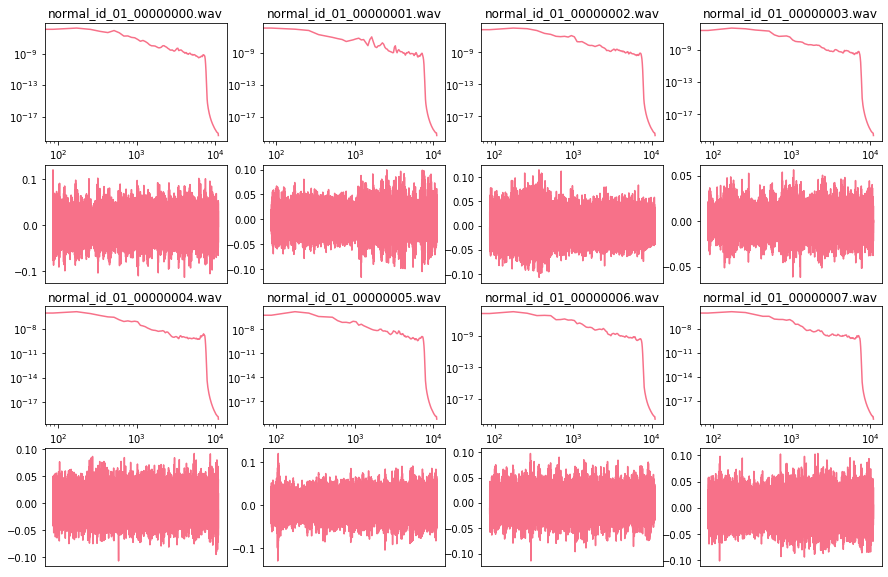

=== Machine type [ToyCar], test set ===


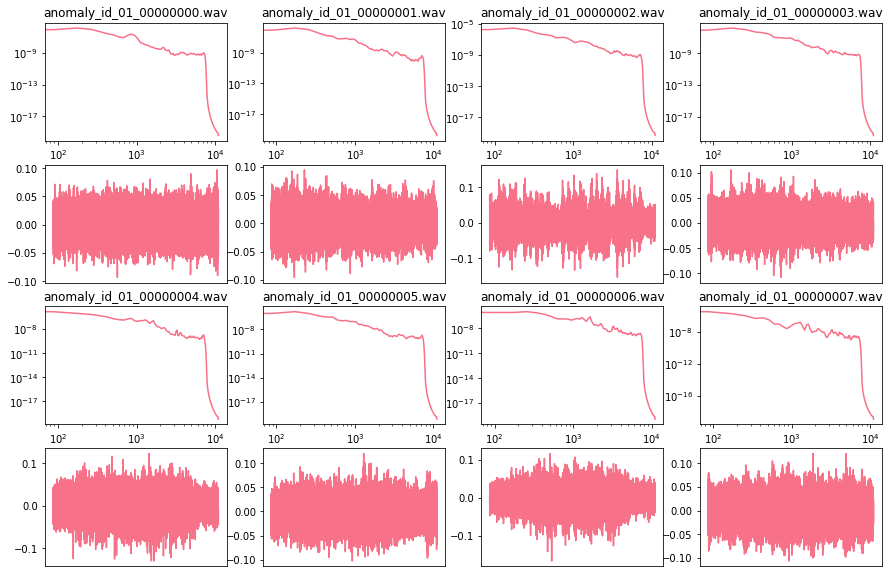

=== Machine type [ToyConveyor], train set ===


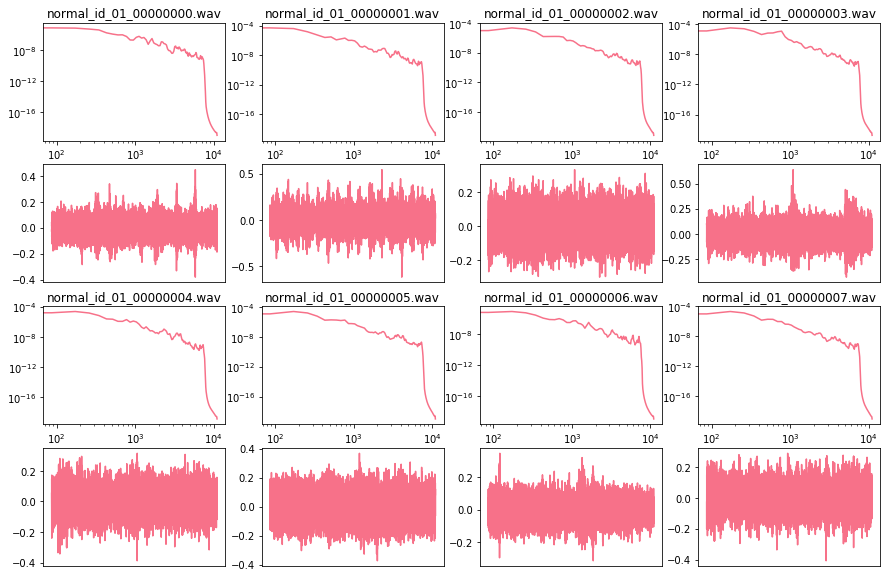

=== Machine type [ToyConveyor], test set ===


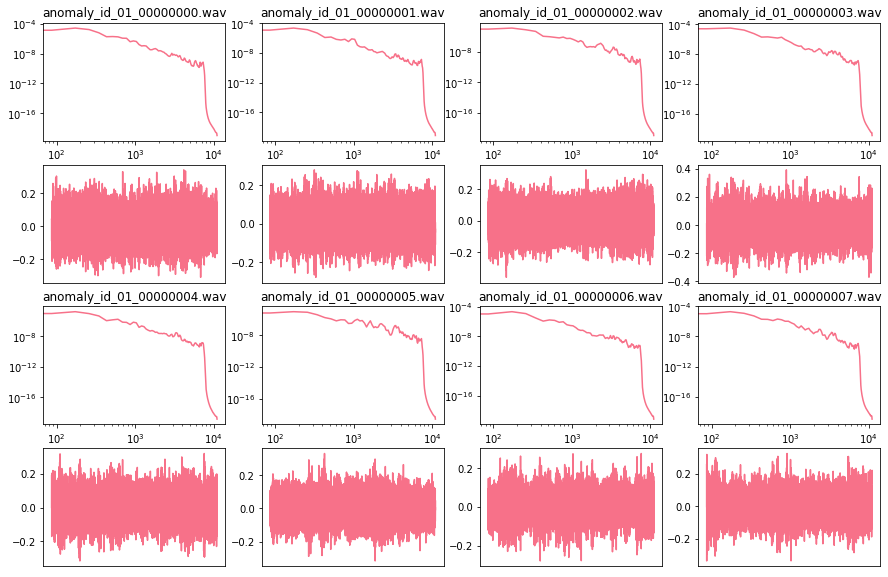

=== Machine type [fan], train set ===


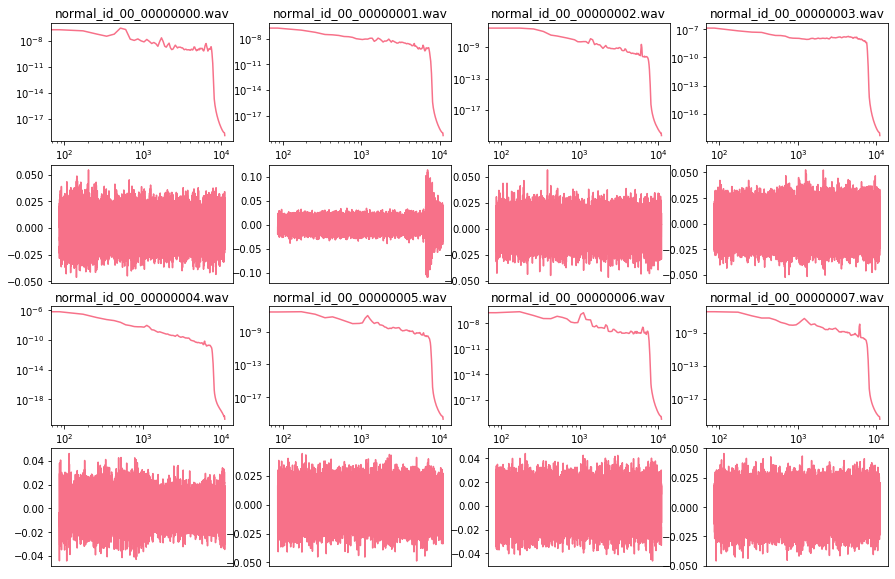

=== Machine type [fan], test set ===


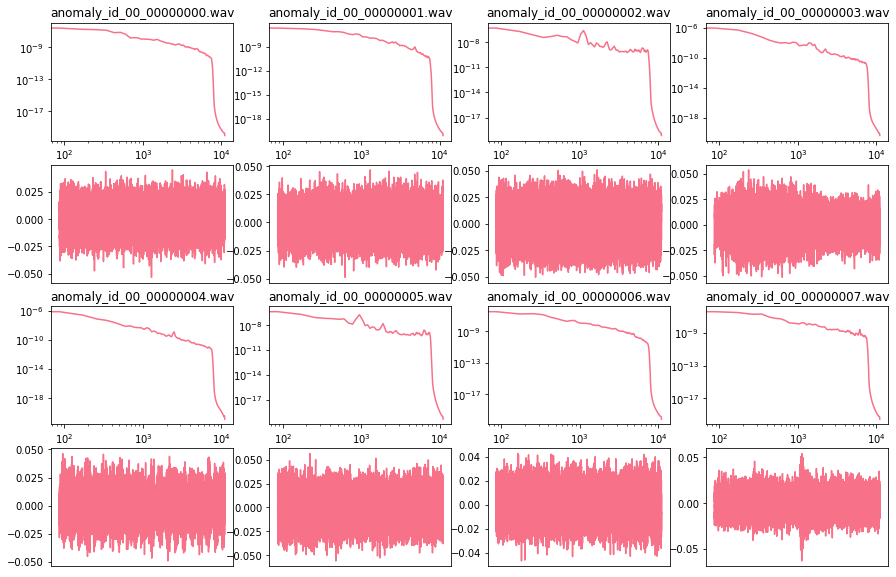

=== Machine type [pump], train set ===


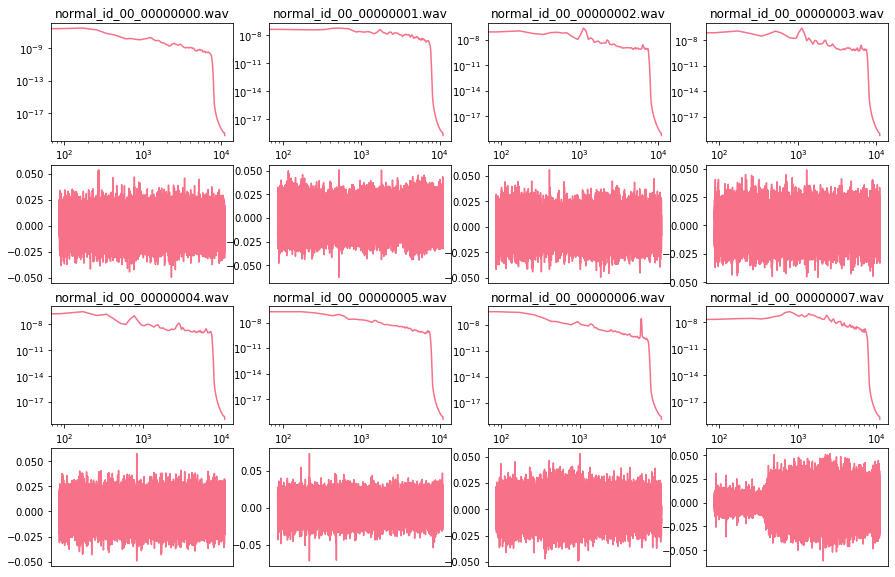

=== Machine type [pump], test set ===


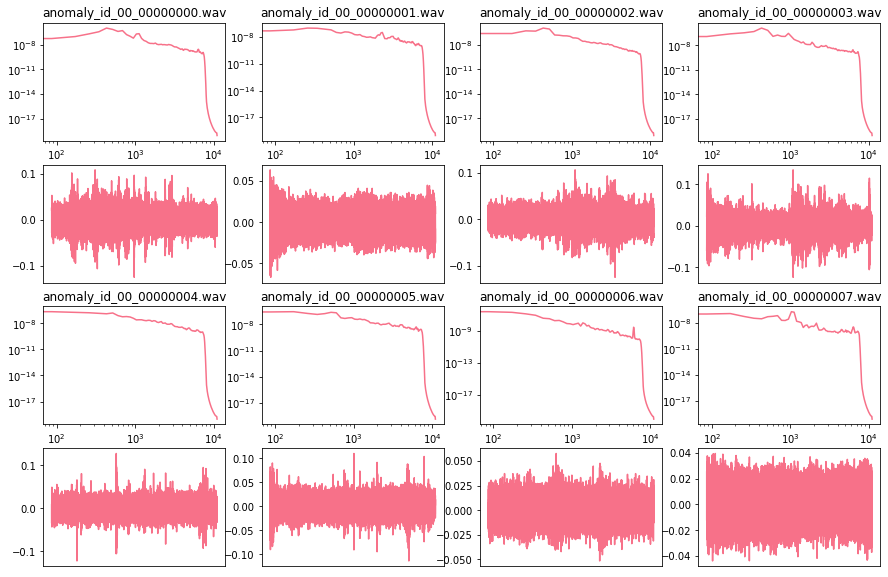

=== Machine type [slider], train set ===


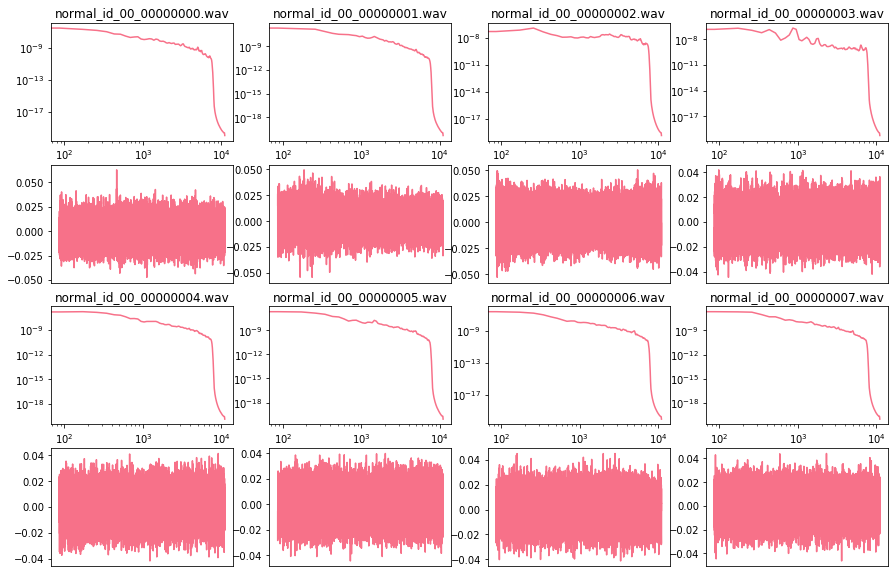

=== Machine type [slider], test set ===


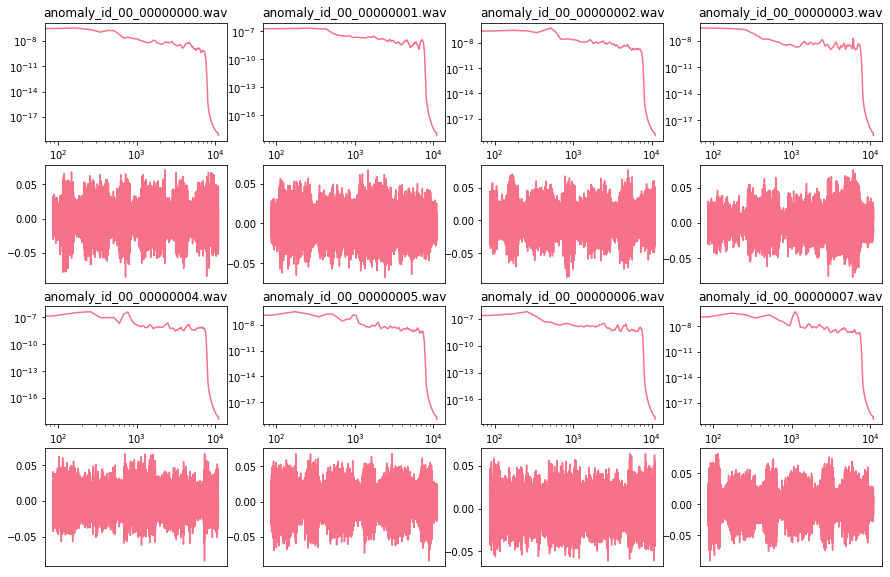

=== Machine type [valve], train set ===


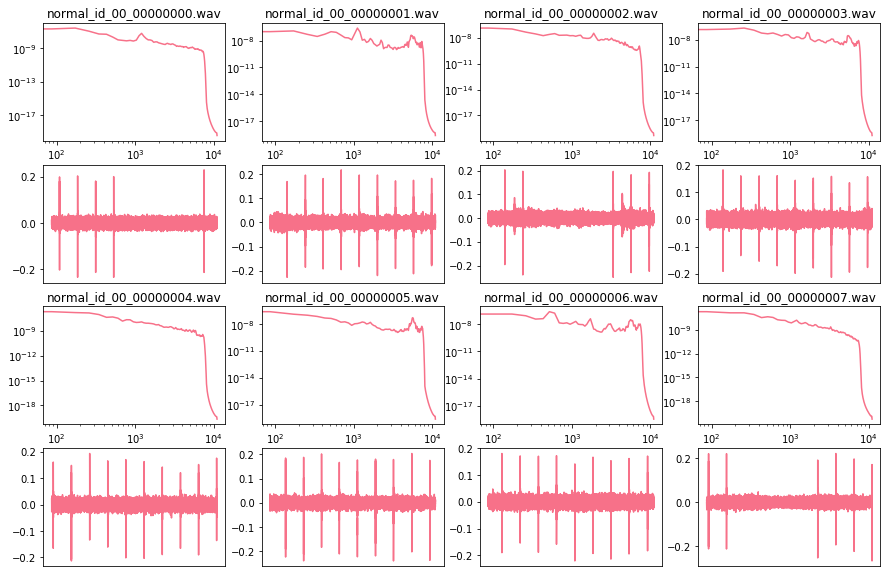

=== Machine type [valve], test set ===


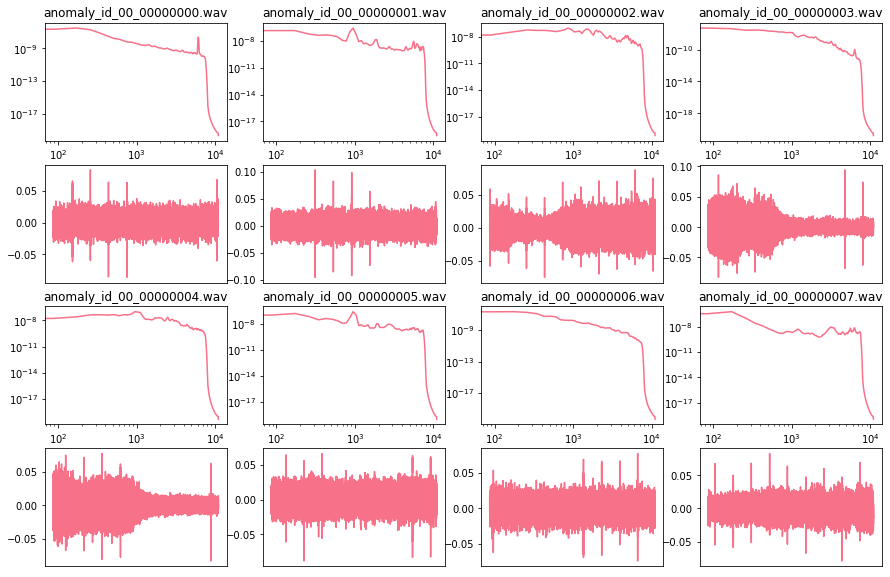

In [12]:
def get_wave_detail(filename):
    wav, sampling_rate = librosa.load(filename)

    n_fft = sampling_rate
    half = len(wav) // 2
    middle = wav[half - n_fft//2: half + n_fft//2]
    freq, P = signal.welch(middle, sampling_rate)

    return wav.shape, sampling_rate, wav.shape[-1]/sampling_rate, wav, P, freq

for t in types:
    for split in ['train', 'test']:
        type_df = df[df['type'] == t][df.split == split].reset_index()
        R = 4
        fig, ax = plt.subplots(R, 4, figsize = (15, 5*R//2))
        print(f'=== Machine type [{t}], {split} set ===')
        for i in range(R * 4):
            file_index = i % 4 + ((i // 8) * 4)
            file_path = Path(type_df.file[file_index])
            shape, sr, sec, wav, P, freq = get_wave_detail(file_path)
            if (i % 8) < 4:
                ax[i//4, i%4].set_title(file_path.name)
                ax[i//4, i%4].plot(freq, P)
                ax[i//4, i%4].set_xscale('log')
                ax[i//4, i%4].set_yscale('log')
            else:
                ax[i//4, i%4].plot(wav)
                ax[i//4, i%4].get_xaxis().set_ticks([])
        plt.show()

## Log mel spectrogram

Lastly, let's see how is the log mel spectrogram that would be major format.

=== Machine type [ToyCar], train set ===


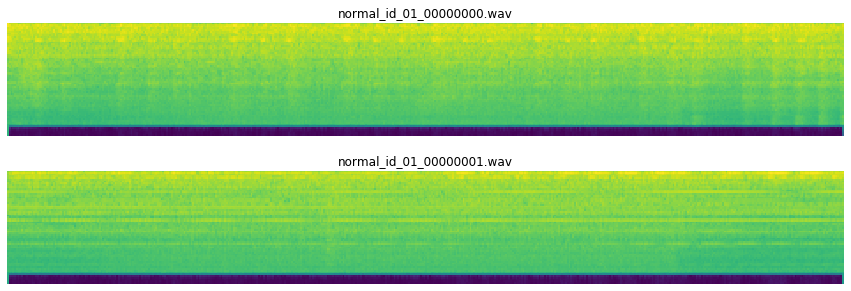

=== Machine type [ToyCar], test set ===


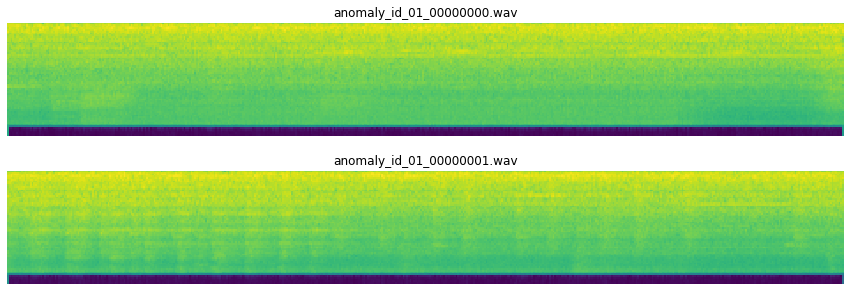

=== Machine type [ToyConveyor], train set ===


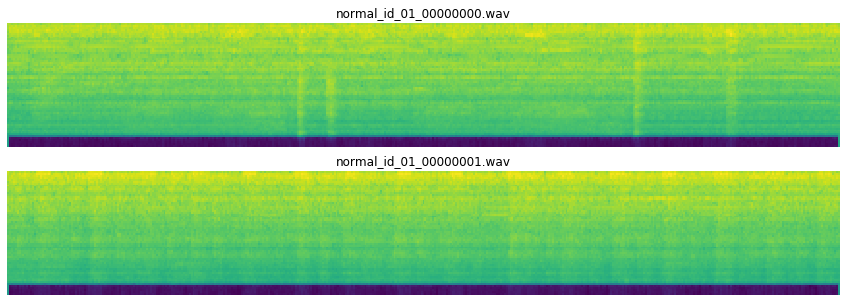

=== Machine type [ToyConveyor], test set ===


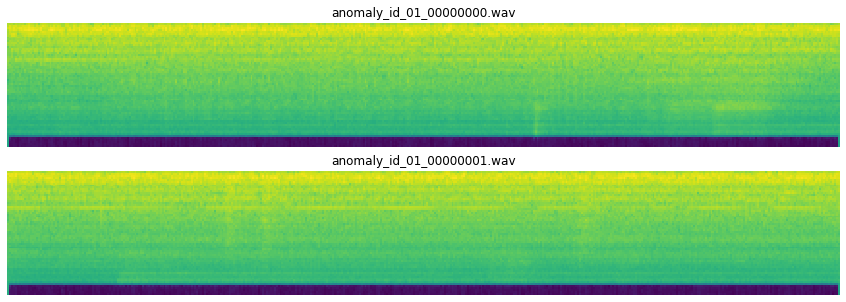

=== Machine type [fan], train set ===


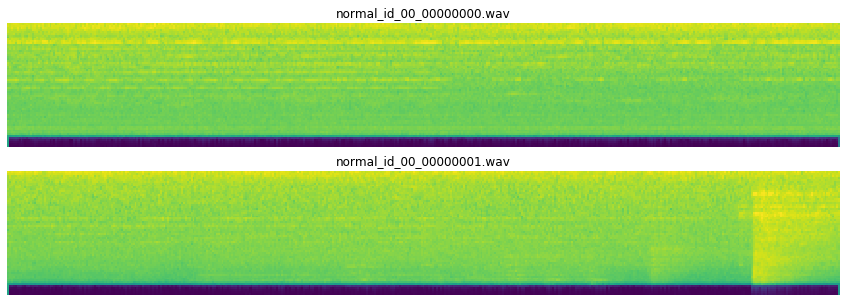

=== Machine type [fan], test set ===


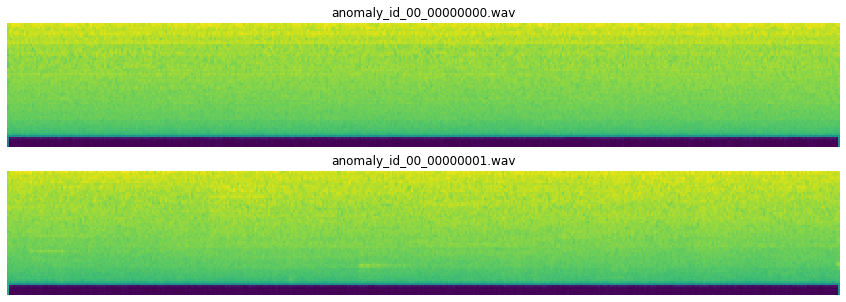

=== Machine type [pump], train set ===


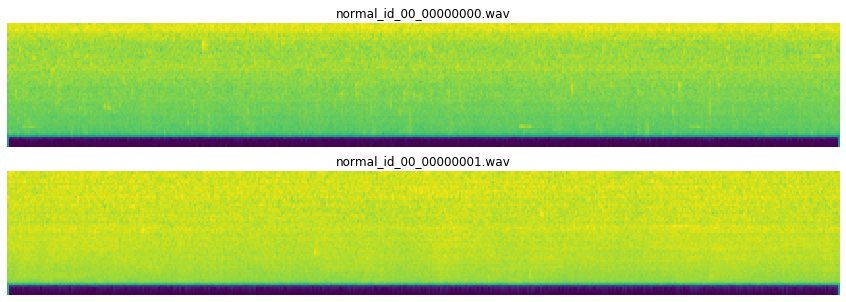

=== Machine type [pump], test set ===


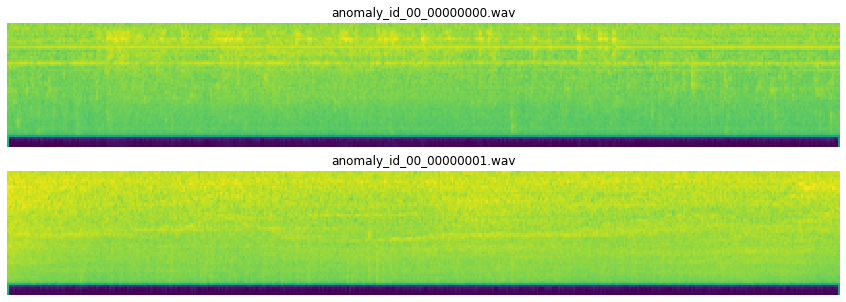

=== Machine type [slider], train set ===


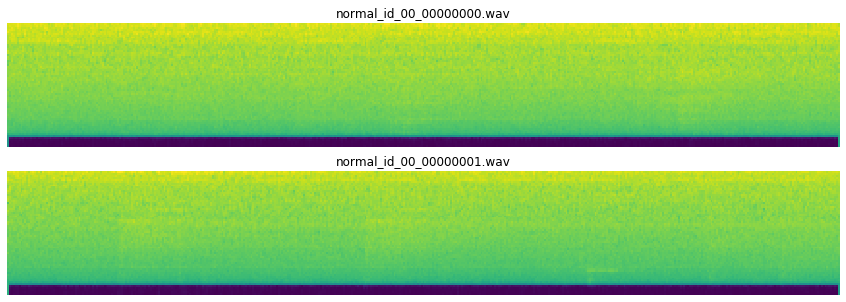

=== Machine type [slider], test set ===


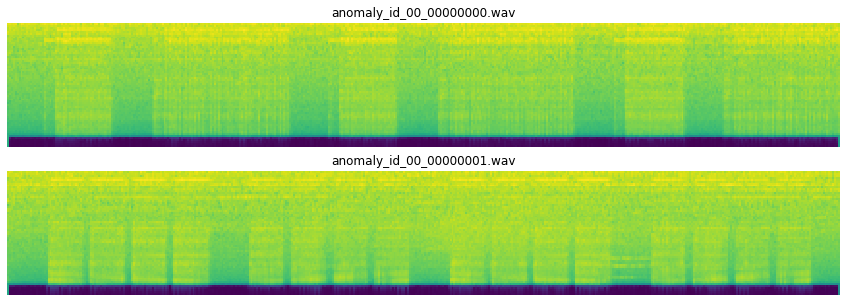

=== Machine type [valve], train set ===


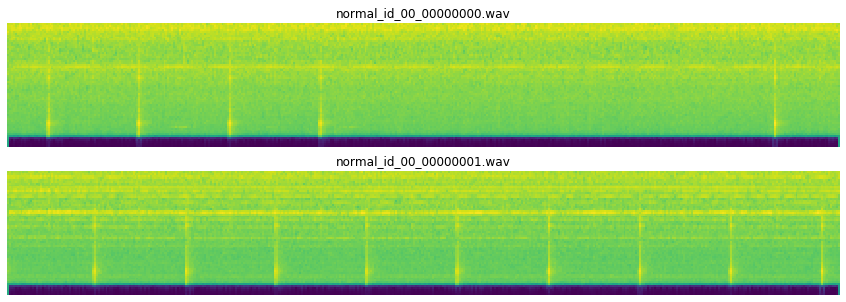

=== Machine type [valve], test set ===


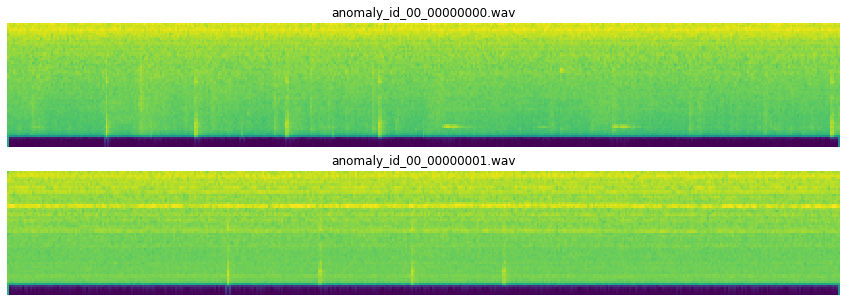

In [11]:
def get_log_mel_spectrogram(filename, n_mels=64,
                        n_fft=1024,
                        hop_length=512,
                        power=2.0):
    wav, sampling_rate = librosa.load(filename)
    mel_spectrogram = librosa.feature.melspectrogram(y=wav,
                                                     sr=sampling_rate,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_mels=n_mels,
                                                     power=power)
    log_mel_spectrogram = 20.0 / power * np.log10(mel_spectrogram + sys.float_info.epsilon)
    return log_mel_spectrogram

for t in types:
    for split in ['train', 'test']:
        type_df = df[df['type'] == t][df.split == split].reset_index()
        R = 2
        fig, ax = plt.subplots(R, 1, figsize = (15, 2.5*R))
        print(f'=== Machine type [{t}], {split} set ===')
        for i in range(R * 1):
            file_index = i
            file_path = Path(type_df.file[file_index])
            mels = get_log_mel_spectrogram(file_path)
            ax[i].set_title(file_path.name)
            ax[i].imshow(mels)
            ax[i].axis('off')
        plt.show()